<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Food_101_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Food 101**

---


Pictures of 101 types of food

**https://www.kaggle.com/datasets/dansbecker/food-101**

In [8]:
import kagglehub, os

path = kagglehub.dataset_download("kmader/food41")
print("Path:", path)
print("Content:", os.listdir(path))

Using Colab cache for faster access to the 'food41' dataset.
Path: /kaggle/input/food41
Content: ['meta', 'food_test_c101_n1000_r64x64x3.h5', 'food_c101_n10099_r32x32x3.h5', 'food_c101_n1000_r384x384x3.h5', 'food_test_c101_n1000_r128x128x3.h5', 'images', 'food_test_c101_n1000_r32x32x3.h5', 'food_test_c101_n1000_r32x32x1.h5', 'food_test_c101_n1000_r128x128x1.h5', 'food_c101_n10099_r64x64x1.h5', 'food_c101_n10099_r64x64x3.h5', 'food_test_c101_n1000_r64x64x1.h5', 'food_c101_n10099_r32x32x1.h5']


In [9]:
import matplotlib.pyplot as plt
import cv2, os, random

img_dir = os.path.join(path, "images")
classes = os.listdir(img_dir)

print("Number of classes:", len(classes))
print("First 10 classes:", classes[:10])

Number of classes: 101
First 10 classes: ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine']


#**`Take a look`**

---


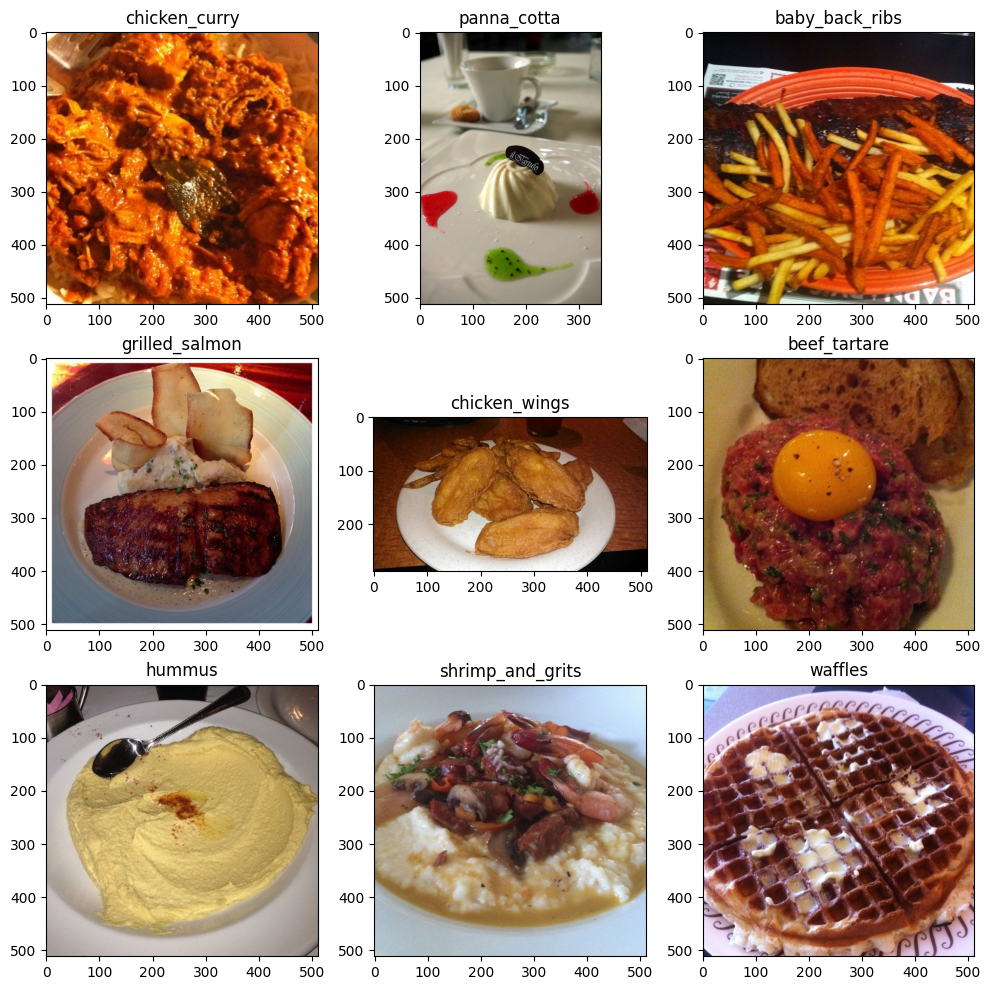

In [10]:
sample_classes = random.sample(classes, 9)

plt.figure(figsize=(12,12))
for i, cls in enumerate(sample_classes):
    cls_path = os.path.join(img_dir, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = cv2.resize(img, (128,128))

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(cls)

plt.show()


In [11]:
import matplotlib.pyplot as plt
import cv2, os, random

meta_dir = os.path.join(path, "meta")
classes = os.listdir(meta_dir)

print("Number of classes:", len(classes))
print("First 10 classes:", classes[:10])
print(path)

Number of classes: 1
First 10 classes: ['meta']
/kaggle/input/food41


In [12]:
meta_dir = "/kaggle/input/food41/meta/meta"
print("Inside meta:", os.listdir(meta_dir))

nested_meta = os.path.join(meta_dir, "meta")
if os.path.exists(nested_meta):
    print("Inside nested meta:", os.listdir(nested_meta))

Inside meta: ['test.txt', 'train.json', 'labels.txt', 'test.json', 'train.txt', 'classes.txt']


In [19]:
base_dir = "/kaggle/input/food41"
images_dir = os.path.join(base_dir, "images")
meta_dir = os.path.join(base_dir, "meta/meta")

In [20]:
train_txt = os.path.join(meta_dir, "train.txt")
test_txt = os.path.join(meta_dir, "test.txt")
classes_txt = os.path.join(meta_dir, "classes.txt")

In [21]:
meta_dir = "/kaggle/input/food41/meta/meta"

with open(os.path.join(meta_dir, "classes.txt"), "r") as f:
    classes = [line.strip() for line in f]

print("Number of Classes", len(classes))
print("First 5 Classes", classes[:5])

with open(os.path.join(meta_dir, "train.txt"), "r") as f:
    train_files = [line.strip() for line in f]

with open(os.path.join(meta_dir, "test.txt"), "r") as f:
    test_files = [line.strip() for line in f]

Number of Classes 101
First 5 Classes ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']


#**`Split the Data`**

---


In [22]:
from sklearn.model_selection import train_test_split

train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

In [23]:
import shutil

def organize(files, split):
    for file in files:
        cls = file.split("/")[0]
        src = os.path.join(images_dir, file + ".jpg")
        dst_dir = os.path.join("data", split, cls)
        os.makedirs(dst_dir, exist_ok=True)
        dst = os.path.join(dst_dir, os.path.basename(src))
        if not os.path.exists(dst):
            shutil.copy(src, dst)

organize(train_files, "train")
organize(val_files, "val")
organize(test_files, "test")

#**`Load the Data`**

---


In [32]:
import tensorflow as tf


size = (224, 224)

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    image_size=size,
    batch_size=64
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/val",
    image_size=size,
    batch_size=64
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "data/test",
    image_size=size,
    batch_size=64
)

Found 60600 files belonging to 101 classes.
Found 15150 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


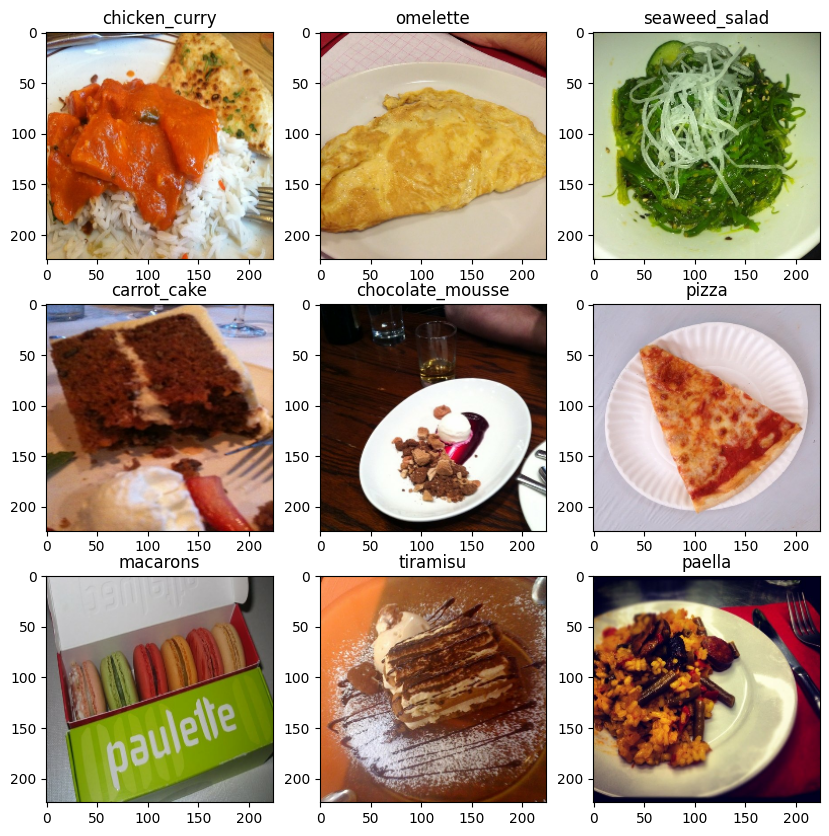

In [33]:

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

#**`Model Building`**

---


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers , models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(101, activation='softmax'),
])

In [35]:
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels[:10].numpy())

(64, 224, 224, 3)
[ 39  33  70  95 100  97  98   5  74  93]


In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 101)            │         6,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,922,597 (91.26 MB)

 Trainable params: 23,922,405 (91.26 MB)

 Non-trainable params: 192 (768.00 B)

In [38]:
hist = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)

Epoch 1/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 154s 153ms/step - accuracy: 0.0084 - loss: 5.0227 - val_accuracy: 0.0086 - val_loss: 4.6157
Epoch 2/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 139s 146ms/step - accuracy: 0.0098 - loss: 4.6194 - val_accuracy: 0.0077 - val_loss: 4.6160
Epoch 3/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 139s 147ms/step - accuracy: 0.0109 - loss: 4.6155 - val_accuracy: 0.0077 - val_loss: 4.6162
Epoch 4/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 140s 148ms/step - accuracy: 0.0111 - loss: 4.6188 - val_accuracy: 0.0077 - val_loss: 4.6163
Epoch 5/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 141s 146ms/step - accuracy: 0.0108 - loss: 4.6156 - val_accuracy: 0.0077 - val_loss: 4.6164
Epoch 6/20
169/947 ━━━━━━━━━━━━━━━━━━━━ 1:28 114ms/step - accuracy: 0.0114 - loss: 4.6186

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

#**`Transfer Learning`**

---


In [41]:

base = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(101, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 226s 221ms/step - accuracy: 0.1714 - loss: 3.6676 - val_accuracy: 0.4154 - val_loss: 2.3758
Epoch 2/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 235s 204ms/step - accuracy: 0.3684 - loss: 2.5524 - val_accuracy: 0.4508 - val_loss: 2.2198
Epoch 3/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 198s 199ms/step - accuracy: 0.4114 - loss: 2.3440 - val_accuracy: 0.4712 - val_loss: 2.1245
Epoch 4/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 202s 199ms/step - accuracy: 0.4390 - loss: 2.2295 - val_accuracy: 0.4801 - val_loss: 2.0572
Epoch 5/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 192s 203ms/step - accuracy: 0.4545 - loss: 2.1326 - val_accuracy: 0.4866 - val_loss: 2.0473
Epoch 6/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 198s 199ms/step - accuracy: 0.4669 - loss: 2.0735 - val_accuracy: 0.4919 - val_loss: 2.0322
Epoch 7/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 206s 204ms/step - accuracy: 0.4849 - loss: 2.0054 - val_accuracy: 0.4831 - val_loss: 2.0569
Epoch 8/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 198s 199ms/step - accuracy: 0.4919 -